In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(60154, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.etiology_2==0)
                  | (lsl_dr.etiology_2.isnull() & ~other_etiology)))

In [6]:
inclusions = lsl_dr[inclusion_mask]
inclusions.drop_duplicates(subset='study_id').shape

(1270, 246)

In [7]:
age_mask = (lsl_dr.age_test>=48) & (lsl_dr.age_test<60)

In [8]:
lsl_dr[age_mask].drop_duplicates(subset='study_id').shape

(2444, 246)

In [9]:
data_4yo = inclusions[age_mask].copy()

/Users/cfonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [10]:
data_4yo.drop_duplicates(subset='study_id').shape

(537, 246)

## Dataset Profile

In [11]:
cols = ['hl', 'male', 'prim_lang', 'sib', '_mother_ed', 'father_ed', 'par1_ed',
'par2_ed', 'parent_hl', 'premature_age', 'identify_mo', 'age_amp',
'age_int', 'age', 'med_cause', 'synd_cause', 'etiology',
'hearing_changes', 'ae', 'ad_250', 'ad_500', 'ad_2000', 'ad_4000',
'degree_hl_ad', 'type_hl_ad', 'age_ci', 'ci_man_ad', 'as_250',
'as_500', 'as_2000', 'as_4000', 'degree_hl_as', 'type_hl_as',
'age_ci_2', 'ci_man_as', 'time', 'school_grade', 
'disenroll_status', 'age_disenrolled', 'funct_out_age', 'slc_fo',
'sle_fo', 'a_fo', 'fam_age', 'family_inv', 'demo_ses',
'school_lunch', 'medicaid', 'newborn_screen_comp',
'newborn_screen_ad', 'newborn_screen_as', 'study_id',
'non_english', 'mother_ed', 'mother_college',
'parent_hearing_loss', 'one_or_both_parent_hl', 'autism',
'secondary_diagnosis', 'premature_weeks', 'tech_ad', 'tech_as',
'tech_right', 'tech_left', 'degree_hl', 'oad', 'hearing_aid',
'cochlear', 'bilateral_ha', 'bilateral_ci', 'bimodal',
'bilateral_other', 'unilateral_ha', 'unilateral_ci',
'unilateral_other', 'bilateral_snhl', 'bilateral_ansd',
'bilateral_mixed', 'bilateral_cond', 'bilateral_normal',
'bilateral_unk', 'unilateral_snhl', 'unilateral_ansd',
'unilateral_mixed', 'unilateral_cond', 'unilateral_unk',
'assymetrical', 'tech', 'implant_category', 'bilateral_hl_normal',
'bilateral_hl_slight', 'bilateral_hl_mild',
'bilateral_hl_moderate', 'bilateral_hl_modsev',
'bilateral_hl_severe', 'bilateral_hl_profound',
'unilateral_hl_slight', 'unilateral_hl_mild',
'unilateral_hl_moderate', 'unilateral_hl_modsev',
'unilateral_hl_severe', 'unilateral_hl_profound',
'hl_assymmetrical', 'ses_cat', 'age_diag', 'sex', 'known_synd',
'synd_or_disab', 'race', 'aaps_ss', 'age_test', 'age_test_aaps',
'age_test_eowpvt', 'age_test_evt', 'age_test_gf2', 'age_test_ppvt',
'age_test_rowpvt', 'domain', 'eowpvt_ss', 'evt_ss', 'evt_version',
'gf2_ss', 'gf3_sis_ss', 'gf3_siw_ss', 'gf_version', 'ppvt_f',
'ppvt_ss', 'rowpvt_ss', 'school', 'score', 'test_name',
'test_type']
pandas_profiling.ProfileReport(data_4yo[cols])

Number of variables,133
Number of observations,2770
Total Missing (%),18.0%
Total size in memory,2.4 MiB
Average record size in memory,903.0 B
Numeric,50
Categorical,8
Boolean,32
Date,0
Text (Unique),0
Rejected,43


## Demographics

In [12]:
data_4yo.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      1405
Female    1365
Name: male, dtype: int64

In [13]:
data_4yo.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       1820
Black        315
Hispanic     270
Other        206
Asian        135
Missing       24
Name: race, dtype: int64

In [14]:
(data_4yo.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    2071
<36 weeks      699
Name: premature_age, dtype: int64

In [15]:
data_4yo.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           637
2          1091
3           593
4+          346
Missing     103
Name: sib, dtype: int64

In [16]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

data_4yo.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    864
Some high school           713
Unknown                    646
Some college               479
8th grade or less           68
Name: mother_ed, dtype: int64

In [17]:
data_4yo.father_ed.replace(ed_lookup).value_counts()

Unknown                    803
Bachelor's degree          643
Some college               490
Post graduate degree       436
High school diploma/GED    340
Some high school            58
Name: father_ed, dtype: int64

In [18]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

data_4yo.family_inv.replace(family_lookup).value_counts()

Ideal Participation      955
Good Participation       601
Average Participation    581
Missing                  361
Below Average            220
Limited Participation     52
Name: family_inv, dtype: int64

In [19]:
data_4yo[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,2274.000000,2236.000000,2046.000000,2750.000000
mean,8.684257,13.452594,14.572336,23.119273
std,12.122483,13.158881,13.166654,15.552384
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,9.000000
50%,3.000000,8.000000,10.000000,22.000000
75%,14.000000,21.000000,22.000000,36.000000
max,54.000000,65.000000,60.000000,73.000000


In [20]:
data_4yo.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION only         1157
Missing              311
OPTION + outside     301
Name: otherserv, dtype: int64

## Hearing loss

In [21]:
data_4yo.degree_hl_ad.isnull().sum()

37

In [22]:
data_4yo.degree_hl_as.isnull().sum()

49

In [23]:
data_4yo.degree_hl_ad.value_counts()

6.0    1201
4.0     438
5.0     412
3.0     378
2.0     215
0.0      52
1.0      37
Name: degree_hl_ad, dtype: int64

In [24]:
data_4yo.degree_hl_as.value_counts()

6.0    1217
4.0     458
3.0     410
5.0     354
2.0     149
0.0      83
1.0      50
Name: degree_hl_as, dtype: int64

In [25]:
hl_data = data_4yo.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [26]:
data_4yo.one_or_both_parent_hl.value_counts()

0.0    1983
1.0     147
Name: one_or_both_parent_hl, dtype: int64

In [27]:
data_4yo.one_or_both_parent_hl.isnull().sum()

640

Individuals with no hearing loss type

In [28]:
hl_data[hl_data.sum(1)==0].index.values

array(['1045-2010-0056', '1045-2010-0056', '1045-2010-0056',
       '1045-2010-0056', '1045-2010-0056', '1149-2008-0019',
       '1149-2008-0019', '1149-2008-0008', '0938-2014-0019',
       '0938-2014-0019', '0938-2014-0019', '0205-2015-0005',
       '0205-2014-0006', '0205-2014-0006', '0205-2014-0006',
       '1149-2010-0052', '1149-2010-0052', '1149-2010-0052',
       '1149-2010-0052', '1149-2010-0052', '1149-2010-0046',
       '1149-2010-0046', '1149-2010-0046', '1149-2010-0046',
       '1149-2010-0046', '1149-2010-0046', '1149-2010-0034',
       '1149-2010-0034', '1149-2010-0034', '1149-2010-0034',
       '1149-2010-0034', '1149-2010-0034', '1149-2009-0038',
       '1149-2009-0038', '1149-2009-0038', '0938-2010-0017',
       '0938-2010-0017', '0938-2010-0017', '0938-2010-0017',
       '0938-2010-0017', '0938-2010-0017', '0938-2009-0013',
       '0938-2010-0017', '0938-2010-0017', '0938-2010-0017',
       '0101-2013-0101', '0101-2013-0101', '0101-2013-0101',
       '0101-2013-0101',

In [29]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      2090
bilateral_cond       160
bilateral_ansd       112
assymetrical          98
bilateral_mixed       92
unilateral_snhl       77
unilateral_cond       54
unilateral_mixed      13
unilateral_ansd        9
bilateral_normal       6
unilateral_unk         0
bilateral_unk          0
dtype: int64

In [30]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.75
bilateral_cond      0.06
assymetrical        0.04
bilateral_ansd      0.04
unilateral_snhl     0.03
bilateral_mixed     0.03
unilateral_cond     0.02
unilateral_unk      0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [31]:
tech_data = data_4yo.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [32]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        1916
bilateral_ha         554
bimodal              182
unilateral_ha         53
unilateral_ci         45
bilateral_other        4
unilateral_other       0
dtype: int64

In [33]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.69
bilateral_ha        0.20
bimodal             0.07
unilateral_ci       0.02
unilateral_ha       0.02
unilateral_other    0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [34]:
tech_data[tech_data.sum(1)==0].index.values

array(['0523-2015-0002', '0523-2015-0002', '0523-2015-0002',
       '0412-2002-0068', '0412-2002-0068', '0412-2003-0060',
       '0412-2003-0060', '0412-2003-0060', '0412-2003-0060',
       '0412-2003-0060', '0412-2003-0060', '0205-2015-0008',
       '0205-2015-0008', '0205-2015-0008', '0205-2015-0008',
       '0205-2015-0008'], dtype=object)

## Hearing Loss

In [35]:
data_4yo.columns[data_4yo.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [36]:
hl_data = data_4yo.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [37]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     1015
bilateral_hl_modsev        294
bilateral_hl_moderate      264
bilateral_hl_severe        201
bilateral_hl_mild           95
unilateral_hl_profound      39
unilateral_hl_severe        29
unilateral_hl_mild          29
unilateral_hl_modsev        27
bilateral_hl_slight         12
unilateral_hl_slight         6
unilateral_hl_moderate       5
bilateral_hl_normal          0
dtype: int64

In [38]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.37
bilateral_hl_modsev       0.11
bilateral_hl_moderate     0.10
bilateral_hl_severe       0.07
bilateral_hl_mild         0.03
unilateral_hl_profound    0.01
unilateral_hl_severe      0.01
unilateral_hl_modsev      0.01
unilateral_hl_mild        0.01
unilateral_hl_moderate    0.00
unilateral_hl_slight      0.00
bilateral_hl_slight       0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [39]:
(data_4yo[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

49

## Summary of scores by domain

In [40]:
test_scores = inclusions[age_mask].copy()

/Users/cfonnesbeck/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [41]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [42]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,355.0,85.6,20.3,0.0,72.0,88.0,101.0,121.0
Expressive Language,487.0,86.6,20.2,45.0,71.5,86.0,102.0,136.0
Expressive Vocabulary,471.0,95.7,21.4,0.0,83.0,97.0,111.0,140.0
Language,496.0,88.5,21.2,48.0,73.0,88.0,104.0,163.0
Receptive Language,486.0,90.3,19.7,50.0,75.0,90.0,105.8,145.0
Receptive Vocabulary,475.0,94.4,18.8,0.0,82.0,96.0,109.0,135.0


In [43]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [44]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

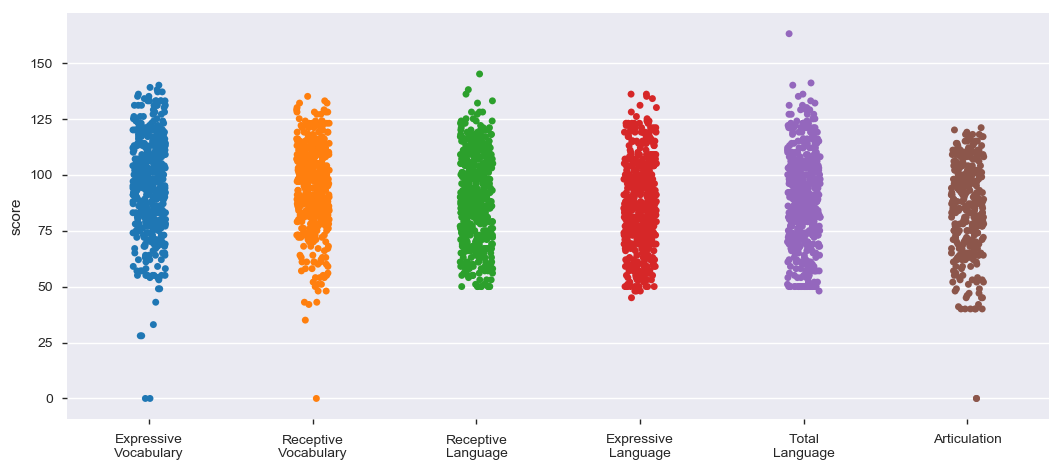

In [45]:
sns.catplot("domain_labels", y="score", data=test_scores)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

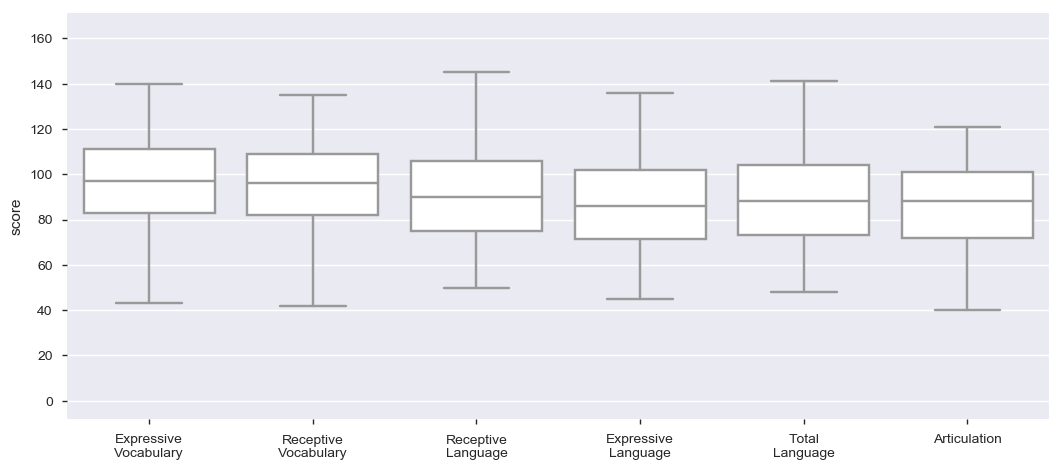

In [46]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [47]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False              207.0  88.956522  19.487687  40.0   
                      True               148.0  80.972973  20.467976   0.0   
Expressive Language   False              280.0  89.335714  19.988208  48.0   
                      True               207.0  82.971014  20.069518  45.0   
Expressive Vocabulary False              276.0  96.268116  19.852379  28.0   
                      True               195.0  95.010256  23.443283   0.0   
Language              False              283.0  90.498233  20.291384  50.0   
                      True               213.0  85.802817  22.212919  48.0   
Receptive Language    False              281.0  91.875445  18.889589  50.0   
                      True               205.0  88.170732  20.623020  50.0   
Receptive Vocabulary  False              279.0  95.261649  17.908229  43.0   
                      True               196.0  93.066327  19.978724   0.0   

                                          25%   50%     75%    max  
domain                age_amp_greater_6                             
Articulation          False              76.0  92.0  104.50  121.0  
                      True               69.0  83.5   95.25  118.0  
Expressive Language   False              74.0  90.0  104.00  136.0  
                      True               69.0  81.0   98.00  134.0  
Expressive Vocabulary False              83.0  98.0  110.25  137.0  
                      True               83.0  96.0  113.00  140.0  
Language              False              76.0  91.0  106.00  141.0  
                      True               69.0  85.0  102.00  163.0  
Receptive Language    False              79.0  92.0  107.00  132.0  
                      True               70.0  88.0  105.00  145.0  
Receptive Vocabulary  False              83.5  97.0  108.50  135.0  
                      True               81.0  94.5  109.00  132.0

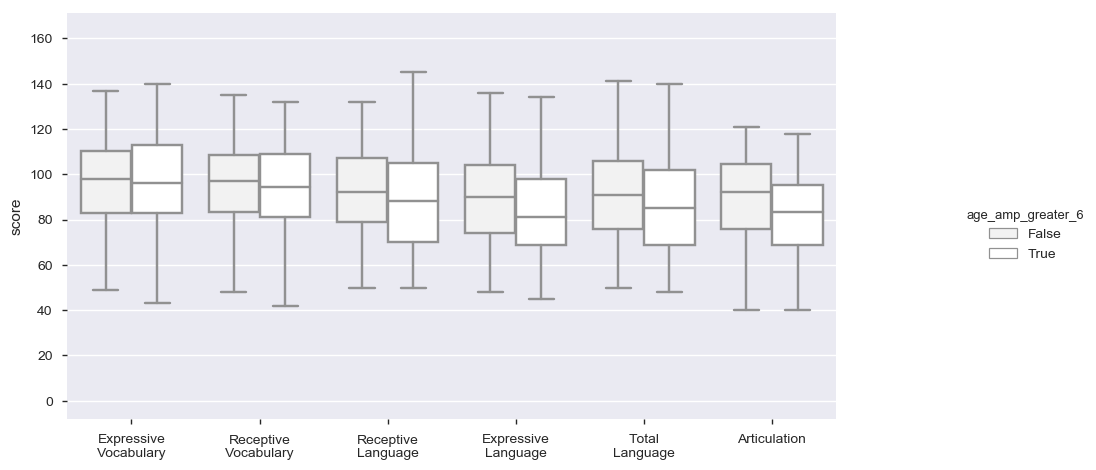

In [48]:
sns.catplot("domain_labels", y="score", hue='age_amp_greater_6', data=test_scores.assign(age_amp_greater_6=test_scores.age_amp>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Age of enrollment greater than 6mo.

In [49]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                 206.0  86.752427  21.516684   0.0   
                      True                  149.0  84.073826  18.341392  40.0   
Expressive Language   False                 272.0  87.757353  20.809803  48.0   
                      True                  215.0  85.204651  19.470202  45.0   
Expressive Vocabulary False                 267.0  95.764045  22.111486   0.0   
                      True                  204.0  95.725490  20.478347   0.0   
Language              False                 276.0  89.351449  21.335324  48.0   
                      True                  220.0  87.390909  21.126320  50.0   
Receptive Language    False                 272.0  91.253676  20.081338  50.0   
                      True                  214.0  89.116822  19.193612  50.0   
Receptive Vocabulary  False                 268.0  93.876866  19.789807   0.0   
                      True                  207.0  94.975845  17.465205  35.0   

                                              25%   50%    75%    max  
domain                age_enroll_greater_6                             
Articulation          False                 73.25  91.5  102.0  120.0  
                      True                  72.00  84.0   97.0  121.0  
Expressive Language   False                 73.00  87.0  104.0  136.0  
                      True                  71.00  85.0  100.0  134.0  
Expressive Vocabulary False                 81.50  98.0  111.5  140.0  
                      True                  83.00  97.0  110.0  139.0  
Language              False                 73.75  90.5  106.0  141.0  
                      True                  72.00  87.0  102.0  163.0  
Receptive Language    False                 77.00  91.0  107.0  136.0  
                      True                  73.00  89.5  103.0  145.0  
Receptive Vocabulary  False                 81.75  95.0  109.0  135.0  
                      True                  83.00  97.0  109.0  133.0

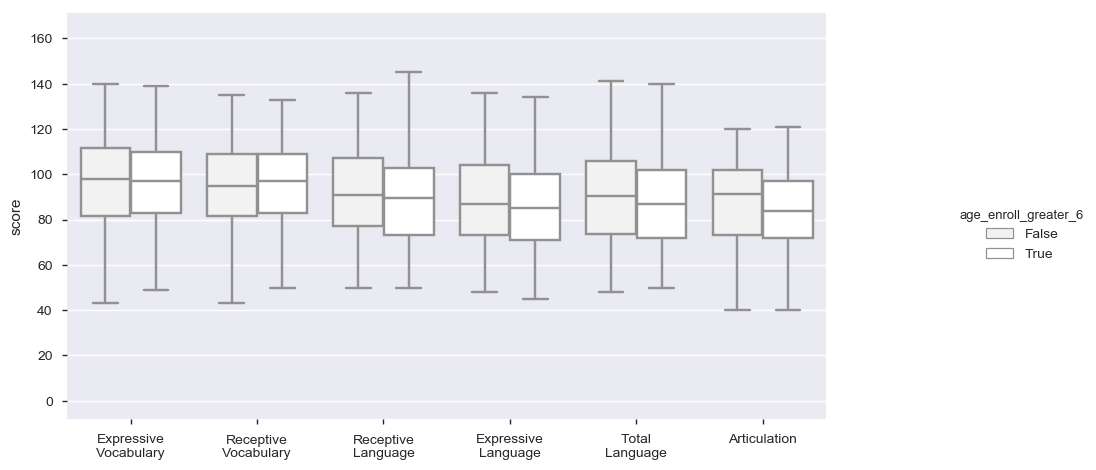

In [50]:
sns.catplot("domain_labels", y="score", hue='age_enroll_greater_6', data=test_scores.assign(age_enroll_greater_6=test_scores.age_int>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

(Non-)Profound hearing loss

In [51]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False        175.0  87.857143  18.276206  42.0  74.00   
                      True         180.0  83.461111  21.853081   0.0  71.75   
Expressive Language   False        243.0  91.106996  19.742267  45.0  76.50   
                      True         244.0  82.172131  19.795536  48.0  67.00   
Expressive Vocabulary False        229.0  99.192140  20.540241   0.0  88.00   
                      True         242.0  92.487603  21.720639   0.0  79.00   
Language              False        250.0  93.616000  20.494209  50.0  80.00   
                      True         246.0  83.264228  20.753542  48.0  67.00   
Receptive Language    False        242.0  95.132231  18.674740  50.0  83.00   
                      True         244.0  85.532787  19.568886  50.0  69.00   
Receptive Vocabulary  False        236.0  97.186441  17.142432  35.0  86.00   
                      True         239.0  91.560669  19.950450   0.0  79.00   

                                     50%     75%    max  
domain                profound_hl                        
Articulation          False         88.0  102.00  120.0  
                      True          87.0  100.00  121.0  
Expressive Language   False         91.0  105.00  136.0  
                      True          80.5   96.25  131.0  
Expressive Vocabulary False        101.0  113.00  139.0  
                      True          94.0  107.00  140.0  
Language              False         94.0  108.00  163.0  
                      True          81.5   98.00  135.0  
Receptive Language    False         96.0  109.00  145.0  
                      True          85.5  100.25  133.0  
Receptive Vocabulary  False         99.0  110.00  135.0  
                      True          91.0  108.00  133.0

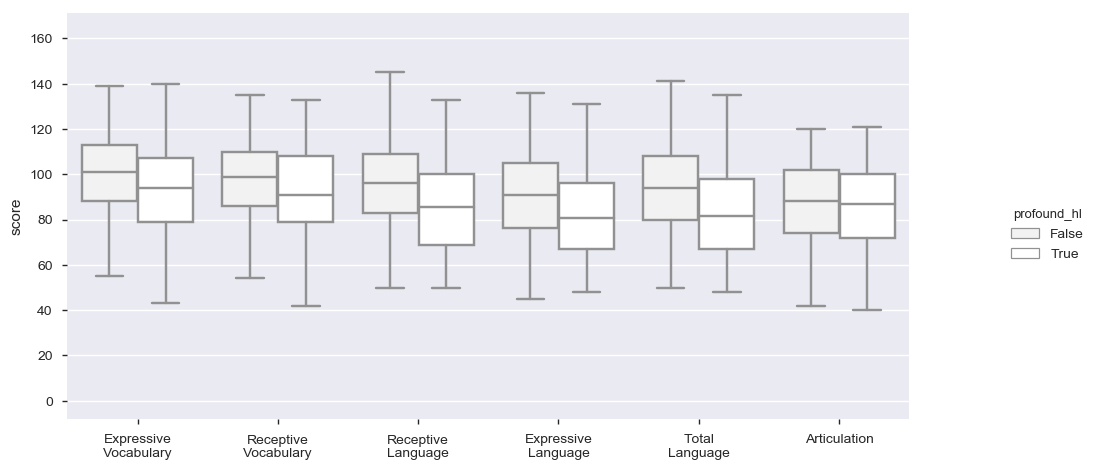

In [52]:
sns.catplot("domain_labels", y="score", hue='profound_hl', data=test_scores.assign(profound_hl=test_scores.degree_hl==6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Parent with(out) hearing loss

In [53]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False           339.0  85.787611  20.322016   0.0   
                      True             16.0  82.250000  19.212843  40.0   
Expressive Language   False           459.0  86.448802  20.180060  45.0   
                      True             28.0  89.607143  21.505106  53.0   
Expressive Vocabulary False           447.0  95.612975  21.588282   0.0   
                      True             24.0  98.250000  17.649363  58.0   
Language              False           469.0  88.396588  21.253267  48.0   
                      True             27.0  89.962963  21.425150  50.0   
Receptive Language    False           459.0  90.311547  19.733843  50.0   
                      True             27.0  90.333333  19.554657  51.0   
Receptive Vocabulary  False           450.0  94.193333  18.852503   0.0   
                      True             25.0  97.280000  17.954851  64.0   

                                        25%    50%    75%    max  
domain                parent_with_hl                              
Articulation          False           72.00   88.0  101.0  121.0  
                      True            73.50   84.0   98.0  110.0  
Expressive Language   False           71.00   86.0  101.0  136.0  
                      True            74.50   89.5  107.0  131.0  
Expressive Vocabulary False           83.00   97.0  111.0  140.0  
                      True            85.25  102.5  113.0  124.0  
Language              False           73.00   88.0  104.0  163.0  
                      True            73.50   90.0  108.0  127.0  
Receptive Language    False           75.00   90.0  105.5  145.0  
                      True            77.00   92.0  105.5  124.0  
Receptive Vocabulary  False           82.00   96.0  109.0  135.0  
                      True            86.00   97.0  111.0  124.0

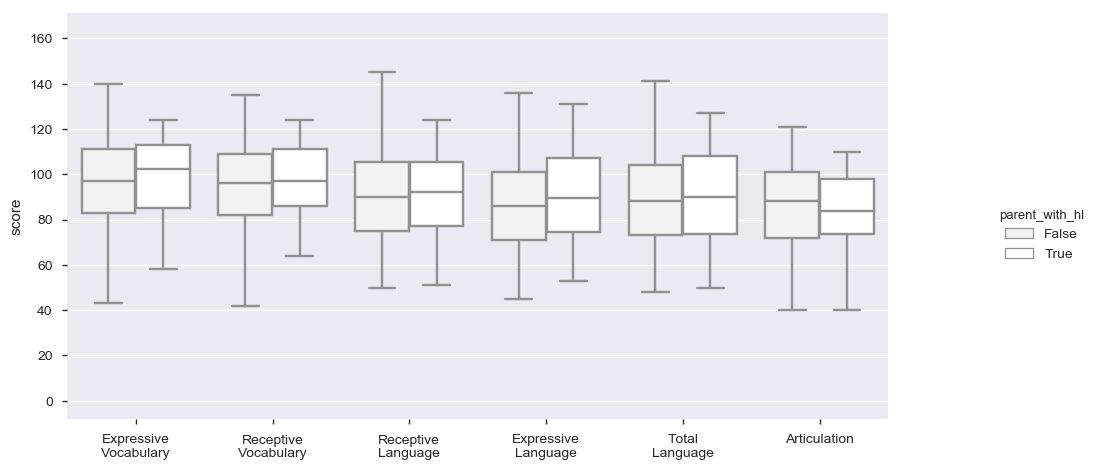

In [54]:
sns.catplot("domain_labels", y="score", hue='parent_with_hl', 
            data=test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss'])),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Mother with(out) college education

In [55]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count        mean        std   min  \
domain                mother_college                                       
Articulation          0               193.0   83.134715  20.236170   0.0   
                      1               162.0   88.598765  19.947590   0.0   
Expressive Language   0               254.0   80.547244  18.944368  48.0   
                      1               233.0   93.261803  19.566314  45.0   
Expressive Vocabulary 0               236.0   89.779661  20.628275   0.0   
                      1               235.0  101.740426  20.500069   0.0   
Language              0               254.0   81.681102  19.754138  48.0   
                      1               242.0   95.619835  20.429925  50.0   
Receptive Language    0               252.0   84.535714  19.224681  50.0   
                      1               234.0   96.534188  18.304087  50.0   
Receptive Vocabulary  0               238.0   88.731092  18.566881   0.0   
                      1               237.0  100.004219  17.314758  35.0   

                                        25%    50%     75%    max  
domain                mother_college                               
Articulation          0               69.00   85.0   99.00  118.0  
                      1               77.00   89.0  104.00  121.0  
Expressive Language   0               67.00   78.0   93.75  135.0  
                      1               81.00   94.0  107.00  136.0  
Expressive Vocabulary 0               77.75   91.0  103.00  138.0  
                      1               90.50  103.0  117.00  140.0  
Language              0               67.00   80.5   95.75  136.0  
                      1               82.00   97.0  110.00  163.0  
Receptive Language    0               69.00   85.0   98.25  138.0  
                      1               86.00   98.0  111.00  145.0  
Receptive Vocabulary  0               78.00   88.5  103.00  128.0  
                      1               89.00  101.0  113.00  135.0

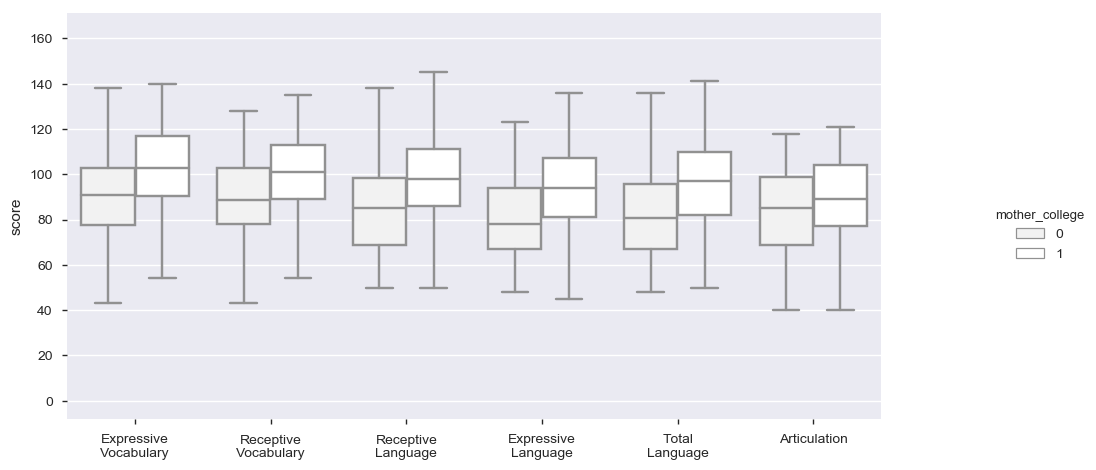

In [56]:
sns.catplot("domain_labels", y="score", hue='mother_college', data=test_scores,
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');